# Load libraries

In [35]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, MaxPool2D,Conv2D,Dropout


# Load the images

AxesImage(135,45;837x271.8)


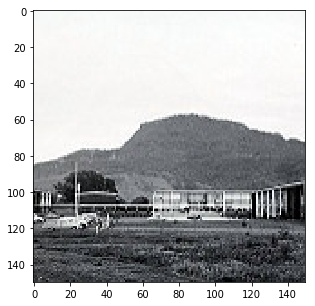

In [17]:
DATADIR1 = 'C:/Users/UPES/Pictures/Analytics Vidhya/intel image classification/seg_train/'
DATADIR = 'C:/Users/UPES/Pictures/Analytics Vidhya/intel image classification/seg_test/'

CATEGORIES = ['buildings','forest','glacier','mountain','sea','street']
for category in CATEGORIES:
    path = os.path.join(DATADIR1, category)
    #assign labels
    class_labels = CATEGORIES.index(category)
    for img in os.listdir(path):
        #read the image in grayscale
        img_arr = cv2.imread(os.path.join(path, img))
        plt.figure(figsize = (15,5))
        print(plt.imshow(img_arr))
        break
    break
    

In [22]:
# 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
size = 100
features = []
labels = []
for category in CATEGORIES:
    path = os.path.join(DATADIR1, category)
    #assign labels
    class_labels = CATEGORIES.index(category)
    for img in os.listdir(path):
        #read the image in grayscale
        img_arr = cv2.imread(os.path.join(path, img))
        img_arr = cv2.resize(img_arr, (size,size))
        features.append(img_arr)
        labels.append(class_labels)

In [24]:
#Shuffle the data
from sklearn.utils import shuffle
features, labels = shuffle(features,labels)
#convert 'features' and 'labels' into np array
features = np.array(features)
labels = np.array(labels)
print(features.shape)
print(labels.shape)

(14034, 100, 100, 3)
(14034,)


we put the features and the labels in different lists so we don't need to separate x and y now

# Visualization

<Figure size 1080x720 with 0 Axes>

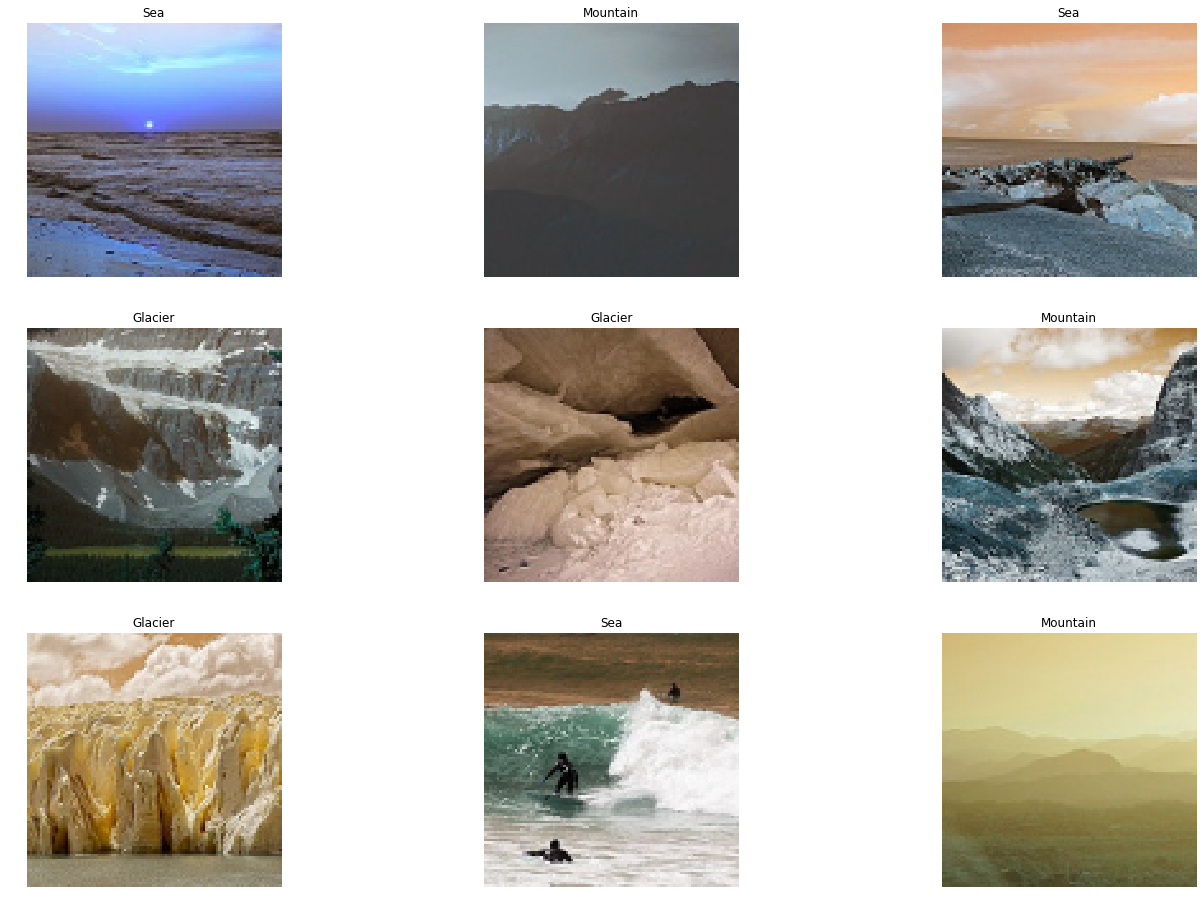

In [25]:
#3 rows and 3 cols
names = {0:'Buildings', 
         1: 'Forest',
         2: 'Glacier',
         3: 'Mountain',
         4: 'Sea',
         5: 'Street'
}
plt.figure(figsize =(15,10))
f,ax = plt.subplots(3,3) 
f.subplots_adjust(0,0,3,3)
for i in range(0,3,1): # 0 to 3 increment by 1
    for j in range(0,3,1):
        num = randint(0,len(features))
        ax[i,j].imshow(features[num])
        #Set title
        val = labels[num]
        ax[i,j].set_title(names[val])
        ax[i,j].axis('off')

In [26]:
features[0]

array([[[155, 109,  88],
        [162, 111,  89],
        [163, 112,  86],
        ...,
        [197, 131,  80],
        [196, 130,  79],
        [195, 129,  78]],

       [[155, 109,  91],
        [159, 110,  86],
        [160, 113,  82],
        ...,
        [197, 131,  78],
        [197, 131,  79],
        [198, 129,  79]],

       [[156, 109,  91],
        [158, 109,  87],
        [160, 113,  85],
        ...,
        [197, 131,  78],
        [198, 131,  78],
        [198, 129,  79]],

       ...,

       [[ 48,  46,  45],
        [ 42,  43,  41],
        [ 47,  49,  44],
        ...,
        [ 58,  58,  57],
        [ 13,  12,  11],
        [ 30,  30,  27]],

       [[ 46,  45,  44],
        [ 37,  36,  35],
        [ 36,  37,  32],
        ...,
        [ 33,  30,  26],
        [ 20,  17,  12],
        [ 20,  17,  13]],

       [[ 43,  43,  43],
        [ 43,  41,  41],
        [ 35,  35,  29],
        ...,
        [ 27,  22,  17],
        [ 21,  16,  11],
        [ 23,  17,  12]]

In [27]:
# Normalize
features = features/255.0

# Build model

In [37]:
model = Sequential()
model.add(Conv2D(200,3,3,activation='relu'))
model.add(Conv2D(180,3,3,activation='relu'))
model.add(MaxPool2D(5,5))
model.add(Conv2D(180,3,3,activation='relu'))
model.add(Conv2D(140,3,3,activation='relu'))
model.add(Conv2D(100,3,3,activation='relu'))
model.add(Conv2D(50,3,3,activation='relu'))
model.add(MaxPool2D(5,5))
model.add(Flatten())
model.add(Dense(180,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dropout(rate=0.5))
#output layer
model.add(Dense(6,activation='softmax'))

#we have multiple classes here so we'll not use binary_crossentropy here
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
pred = model.fit(features,labels,epochs=15,validation_split=0.30)

ValueError: Negative dimension size caused by subtracting 3 from 2 for 'Conv2D_5' (op: 'Conv2D') with input shapes: [?,2,2,180], [3,3,180,180].

In [ ]:
#Test your model
x_test,test_labels = get_images('C:/Users/input/seg_test/seg_test/')
x_test = np.array(x_test)
test_labels = np.array(test_labels)
model.evaluate(x_test,test_labels, verbose=1)